<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Phân tích giá nhà Hà Nội </br>
  @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
   Data exploration 📌
</div>

# Import những thư viện cần thiết

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')


# Khám phá dữ liệu

## Đọc file dataset

In [52]:

df = pd.read_csv('./VN_housing_dataset.csv')

In [53]:
df.head(5)

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


## Dữ liệu có bao nhiêu cột và bao nhiêu dòng?

In [54]:
df.shape

(82497, 13)

## Ý nghĩa của mỗi dòng là gì?

Mỗi dòng chứa các thông tin của mỗi ngôi nhà được đăng bán.

## Kiểm tra dòng trùng lặp

Kiểm tra dữ liệu xem có tồn tại dòng dữ liệu nào bị trùng lặp hay không và thực hiện xóa:

In [55]:
if sum(df.duplicated()) == 0:
    print('Dữ liệu không có dòng bị trùng lặp')
else:
    print('Dữ liệu có', sum(df.duplicated()), 'dòng bị trùng lặp')
    df=df.drop_duplicates()

Dữ liệu không có dòng bị trùng lặp


## Ý nghĩa của mỗi cột là gì?

- Ngày: Ngày ngôi nhà đăng bán
- Địa chỉ: Địa chỉ ngôi nhà
- Quận: Quận của ngôi nhà
- Huyện: Huyện của ngôi nhà
- Loại hình nhà ở: Loại của ngôi nhà
- Giấy tờ pháp lý: Thông tin về giấy tờ của ngôi nhà
- Số tầng : Số tầng của ngôi nhà
- Số phòng ngủ : Số phòng ngủ của ngôi nhà.
- Diện tích : Diện tích của ngôi nhà.
- Dài: Chiều dài của ngôi nhà.
- Rộng: Chiều rộng của ngôi nhà.
- Giá/m2: Giá mỗi đơn vị diện tích ($m^2$) của ngôi nhà.


## Mỗi cột có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu không phù hợp cho việc xử lí dữ liệu không?

In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82497 entries, 0 to 82496
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       82496 non-null  float64
 1   Ngày             82496 non-null  object 
 2   Địa chỉ          82449 non-null  object 
 3   Quận             82495 non-null  object 
 4   Huyện            82449 non-null  object 
 5   Loại hình nhà ở  82465 non-null  object 
 6   Giấy tờ pháp lý  53610 non-null  object 
 7   Số tầng          36399 non-null  object 
 8   Số phòng ngủ     82458 non-null  object 
 9   Diện tích        82495 non-null  object 
 10  Dài              19827 non-null  object 
 11  Rộng             35445 non-null  object 
 12  Giá/m2           82484 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.2+ MB


- Cột `Ngày` nên có datatype là Date.
- Cột `Diện tích` nên có datatype là Float64.
- Cột `Số phòng ngủ` nên có datatype là Int64.
- Cột `Dài` nên có datatype là Float64.
- Cột `Rộng` nên có datatype là Float64.
- Cột `Giá` nên có datatype là Float64.

## Kiểm tra tỉ lệ missing

Tỉ lệ giá trị bị thiếu ở mỗi cột:

In [57]:
df.isnull().sum() / len(df)

Unnamed: 0         0.000012
Ngày               0.000012
Địa chỉ            0.000582
Quận               0.000024
Huyện              0.000582
Loại hình nhà ở    0.000388
Giấy tờ pháp lý    0.350158
Số tầng            0.558784
Số phòng ngủ       0.000473
Diện tích          0.000024
Dài                0.759664
Rộng               0.570348
Giá/m2             0.000158
dtype: float64

## Xóa cột không cần thiết

- Xóa cột `Unnamed: 0` không cần thiết
- Drop những dòng NaN ở cột `Ngày` và chuyển về định dạng `datetime64[ns]`

In [58]:
df = df.drop(['Unnamed: 0'], axis=1)


### Xử lý datatype

In [59]:
df = df.dropna(subset = ['Ngày'])
df['Ngày']= pd.to_datetime(df['Ngày'])

Tiếp tục drop những dòng NaN ở cột `Địa chỉ`

In [60]:
df = df.dropna(subset=['Địa chỉ'])

Kiểm tra cột NaN ở cột `Quận` và `Huyện`

In [61]:
df[df["Quận"].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
48418,2020-07-03,"68, Ngọc Hồi, Hà Nội",NaN,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,71 m²,6 m,6 m,43 triệu/m²


In [62]:
# Sửa hiện sửa lỗi
df.loc[48418, 'Quận'] = 'Thanh Trì'
df.loc[48418, 'Huyện'] = 'Ngọc Hồi'

Đổi tên các cột giúp thực hiện lọc Outliers dễ dàng hơn và thực hiện fill các giá trị NaN bằng 'Chưa rõ'

In [63]:
df.rename(columns = {'Loại hình nhà ở':'Loại_hình_nhà_ở', 'Giấy tờ pháp lý':'Giấy_tờ_pháp_lý',
                              'Số phòng ngủ':'Số_phòng_ngủ', 'Diện tích': 'Diện_tích', 'Địa chỉ': 'Địa_chỉ'}, inplace = True)

df['Huyện'].fillna('Chưa rõ', inplace=True)
df['Loại_hình_nhà_ở'].fillna('Chưa rõ', inplace=True)
df['Giấy_tờ_pháp_lý'].fillna('Chưa rõ', inplace=True)
df['Số_phòng_ngủ'].fillna('Chưa rõ', inplace=True)
df['Giá/m2'].fillna('Chưa rõ', inplace=True)

In [64]:
# Drop cột 'Số tầng' do có giá trị null nhiều (~ 50.000 dòng > 50% dữ liệu)
df = df.drop('Số tầng', axis = 1)
df = df.dropna(subset=['Diện_tích'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82448 entries, 0 to 82495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ngày             82448 non-null  datetime64[ns]
 1   Địa_chỉ          82448 non-null  object        
 2   Quận             82448 non-null  object        
 3   Huyện            82448 non-null  object        
 4   Loại_hình_nhà_ở  82448 non-null  object        
 5   Giấy_tờ_pháp_lý  82448 non-null  object        
 6   Số_phòng_ngủ     82448 non-null  object        
 7   Diện_tích        82448 non-null  object        
 8   Dài              19827 non-null  object        
 9   Rộng             35443 non-null  object        
 10  Giá/m2           82448 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 7.5+ MB


In [66]:
df.isnull().sum() / len(df)

Ngày               0.000000
Địa_chỉ            0.000000
Quận               0.000000
Huyện              0.000000
Loại_hình_nhà_ở    0.000000
Giấy_tờ_pháp_lý    0.000000
Số_phòng_ngủ       0.000000
Diện_tích          0.000000
Dài                0.759521
Rộng               0.570117
Giá/m2             0.000000
dtype: float64

# Loại bỏ outlier ở cột `Diện tích`

In [67]:
df['Diện_tích'] = df['Diện_tích'].str.replace(' m²', '').astype(float)
df['Dài'] = df['Dài'].str.replace(' m', '').astype(float)
df['Rộng'] = df['Rộng'].str.replace(' m', '').astype(float)

In [68]:
# Kiểm tra liệu có dòng nào với Dài * Rộng != Diện tích
rows_with_incorrect_area = df[np.abs(df['Dài'] * df['Rộng'] - df['Diện_tích']) > 1e-6]
if rows_with_incorrect_area.empty:
    print('All rows are correct. No need to change.')
else:
    print(rows_with_incorrect_area[['Dài', 'Rộng', 'Diện_tích']])

        Dài  Rộng  Diện_tích
5      12.1   3.8       46.0
8      12.0   6.5       75.0
14     15.2   3.9       52.8
15     12.0   4.2       52.0
28     12.0   4.2       45.0
...     ...   ...        ...
82355  13.0   3.0       37.0
82356  16.0   6.0      100.0
82359  14.0   5.0       80.0
82361  20.0   4.0       89.0
82362  20.0   4.0       90.0

[14321 rows x 3 columns]


Dataframe's shape before: (82448, 11) 

Dataframe's shape after: (80924, 11) 



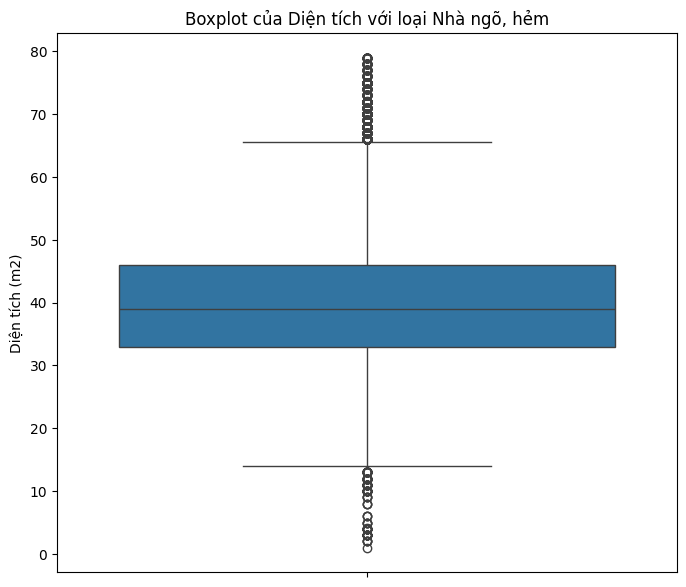

In [69]:
rows_to_drop = df.query('Diện_tích >= 80 & Loại_hình_nhà_ở == "Nhà ngõ, hẻm"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà ngõ, hẻm'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà ngõ, hẻm')
plt.show()

Dataframe's shape before: (80924, 11) 

Dataframe's shape after: (80879, 11) 



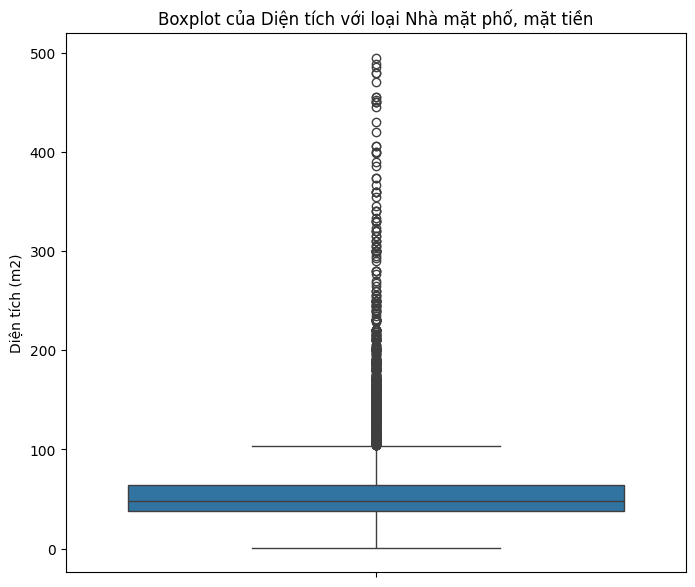

In [70]:
rows_to_drop = df.query('Diện_tích >= 500 & Loại_hình_nhà_ở == "Nhà mặt phố, mặt tiền"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà mặt phố, mặt tiền'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà mặt phố, mặt tiền')
plt.show()


Dataframe's shape before: (80879, 11) 

Dataframe's shape after: (80865, 11) 



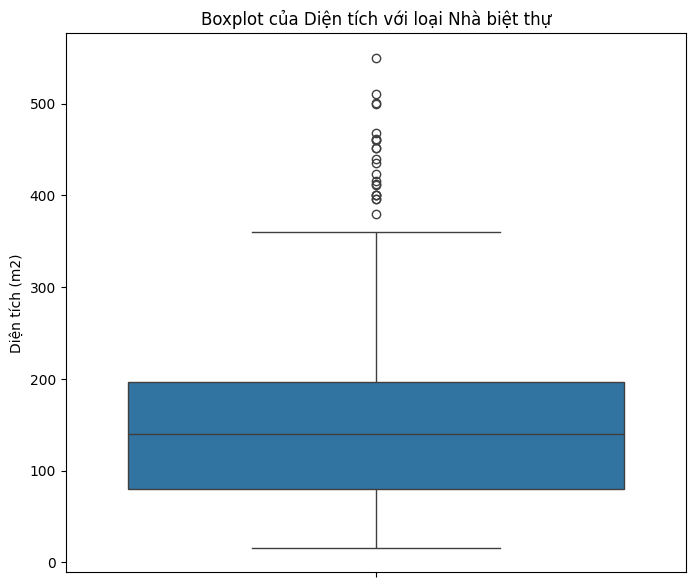

In [71]:
rows_to_drop = df.query('Diện_tích > 550 & Loại_hình_nhà_ở == "Nhà biệt thự"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà biệt thự'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà biệt thự')
plt.show()

Dataframe's shape before: (80865, 11) 

Dataframe's shape after: (80855, 11) 



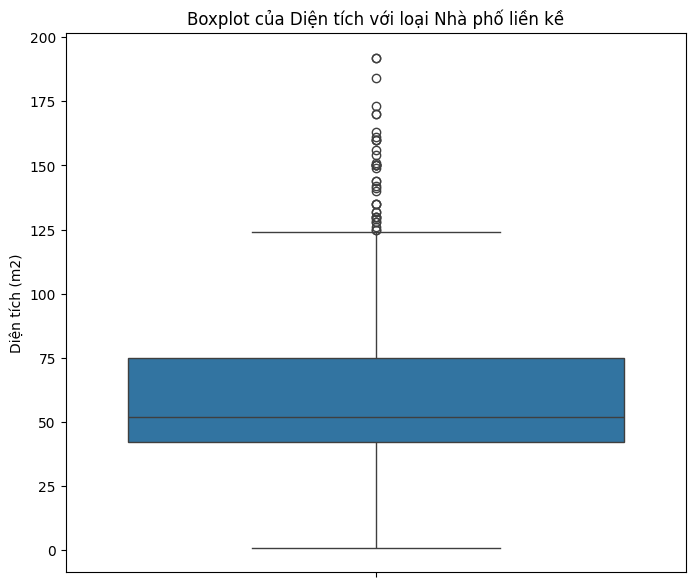

In [72]:
rows_to_drop = df.query('Diện_tích > 192 & Loại_hình_nhà_ở == "Nhà phố liền kề"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà phố liền kề'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà phố liền kề')
plt.show()


In [73]:
# Tương tự với cột 'Số tầng', 2 cột 'Dài' và 'Rộng' thiếu quá nhiều nên sẽ drop 2 cột này
df = df.drop(['Dài', 'Rộng'], axis = 1)

In [74]:
df.isnull().sum() / len(df)

Ngày               0.0
Địa_chỉ            0.0
Quận               0.0
Huyện              0.0
Loại_hình_nhà_ở    0.0
Giấy_tờ_pháp_lý    0.0
Số_phòng_ngủ       0.0
Diện_tích          0.0
Giá/m2             0.0
dtype: float64

### Xử lý cột `Giá/m2` và quy về thành 1 loại đơn vị

In [75]:
# Kiểm tra các dòng có dạng 'tỷ/m2'
rows = df[df['Giá/m2'].str.contains('tỷ/m²')]

print(rows['Giá/m2'])

1100     1,202777777 tỷ/m²
1144     1,142857142 tỷ/m²
1657            1,96 tỷ/m²
2849     1,557142857 tỷ/m²
2939     1,316666666 tỷ/m²
               ...        
78107    5,833333333 tỷ/m²
79034         1,0125 tỷ/m²
79835    1,706666666 tỷ/m²
80222            1,5 tỷ/m²
81845    2,538461538 tỷ/m²
Name: Giá/m2, Length: 116, dtype: object


In [76]:
# Kiểm tra các dòng có dạng 'đ/m2'
rows = df[df['Giá/m2'].str.contains('đ/m²')]

print(rows['Giá/m2'])

93       247.787 đ/m²
283       90.476 đ/m²
351      125.000 đ/m²
621       75.471 đ/m²
1280      84.375 đ/m²
             ...     
82294     59.183 đ/m²
82316     85.555 đ/m²
82325     86.842 đ/m²
82344     69.565 đ/m²
82349    105.714 đ/m²
Name: Giá/m2, Length: 688, dtype: object


In [77]:
def is_valid_price(price_string):
    # Kiểm tra nếu giá trị chứa nhiều hơn một dấu phẩy
    if price_string.count(',') > 1:
        return False
    return True

def convert_price_unit(price_string):
  if 'tỷ/m²' in price_string:
    # Remove 'tỷ/m²' and multiply by 1000 to convert to triệu/m²
    price_string = price_string.replace('tỷ/m²', '').replace('.', '').replace(',', '.')
    return float(price_string) * 1000
  elif 'đ/m²' in price_string:
    # Remove 'đ/m²' and divide by 1000000 to convert to triệu/m²
    price_string = price_string.replace('đ/m²', '').replace(',', '.')
    return float(price_string) / 1000000
  elif 'triệu/m²' in price_string:
    # Remove 'triệu/m²'
    price_string = price_string.replace('triệu/m²', '').replace(',', '.')
    return float(price_string)

# Lọc bỏ các giá trị không hợp lệ
df = df[df['Giá/m2'].apply(is_valid_price)]

# Áp dụng hàm convert_price_unit
df['Giá/m2'] = df['Giá/m2'].apply(convert_price_unit)

# Đổi tên cột tạm thời để thực hiện query loại các outlier
df.rename(columns={'Giá/m2': 'Giá'}, inplace=True)

# Hiển thị dataframe
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65.00


Thực hiện loại các outlier

Dataframe's shape before: (80855, 9) 

Dataframe's shape after: (80815, 9) 



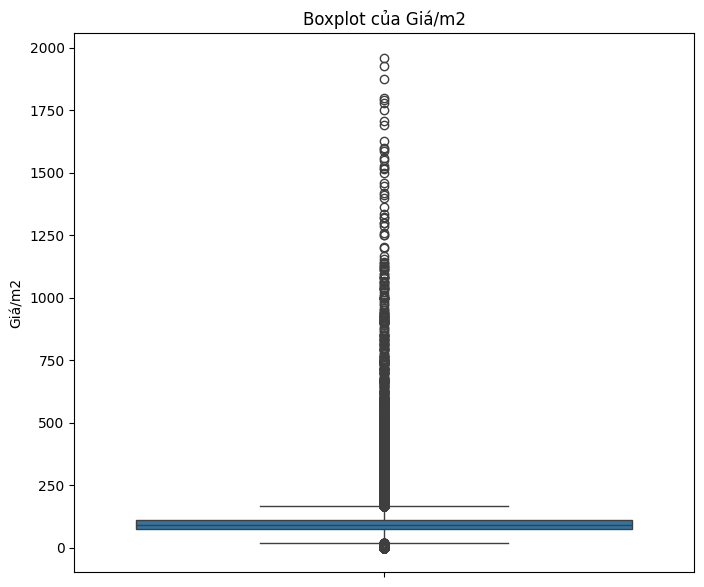

In [78]:
rows_to_drop = df.query('Giá >= 2000').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df['Giá'])
plt.ylabel('Giá/m2')
plt.title('Boxplot của Giá/m2')
plt.show()

df.rename(columns={'Giá': 'Giá/m2 (triệu/m2)'}, inplace=True)

Tính tổng giá và lưu vào cột `Tổng_giá (Triệu đồng)`

In [79]:
# Tính giá trị trung bình của cột 'Giá/m2 (triệu/m2)' cho các hàng được lọc
mean_value = df['Giá/m2 (triệu/m2)'].mean()

# Thay thế các giá trị trong cột 'Gia' của các hàng được lọc bằng giá trị trung bình
df.loc[df['Giá/m2 (triệu/m2)'] <= 10, 'Giá/m2 (triệu/m2)'] = mean_value
def calculate_total_price(row):
  if row['Giá/m2 (triệu/m2)'] == 'Chưa rõ':
    return 'Chưa rõ'
  else:
    return row['Giá/m2 (triệu/m2)'] * row['Diện_tích']

df['Tổng_giá (Triệu đồng)'] = df.apply(calculate_total_price, axis=1)
# Tính trung bình của cột 'Tổng_giá (Triệu đồng)' mà không bao gồm các giá trị 'Chưa rõ'
mean_price = df[df['Tổng_giá (Triệu đồng)'] != 'Chưa rõ']['Tổng_giá (Triệu đồng)'].mean()

# Điền giá trị trung bình vào các hàng có giá trị 'Chưa rõ'
df['Tổng_giá (Triệu đồng)'] = df['Tổng_giá (Triệu đồng)'].apply(lambda x: mean_price if x == 'Chưa rõ' else x)
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2 (triệu/m2),Tổng_giá (Triệu đồng)
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,86.96,4000.16
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,116.22,4300.14
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65.00,2600.00


In [80]:
# Hàm để trích xuất tên đường từ địa chỉ
def extract_street(address):
    match = re.search(r'(Đường|phố|Phố) [^,]+', address)
    if match:
        return match.group(0)
    return None

# Áp dụng hàm để tạo cột 'Đường'
df['Đường'] = df['Địa_chỉ'].apply(extract_street)

In [81]:
df.loc[df['Đường'].isna(), 'Đường'] = df.loc[df['Đường'].isna(), 'Địa_chỉ'].str.split(',').str[0]

### Chuyển cột `Quận` thành dạng không dấu

In [82]:
from unidecode import unidecode
df['Quan'] = df['Quận'].apply(lambda x: unidecode(x))

In [83]:
import re

# Gộp chung 2 Quận Nam Từ Liêm và Quận Bắc Từ Liêm thành Quận Từ Liêm
df['Quan'] = df['Quan'].replace(['Quan Nam Tu Liem', 'Quan Bac Tu Liem'], 'Quan Tu Liem')

# Loại bỏ các từ 'Quan', 'Huyen', 'Thi xa' trong cột 'Quan'
df['Quan'] = df['Quan'].str.replace(r'\b(Quan|Huyen|Thi xa)\b', '', regex=True).str.strip()

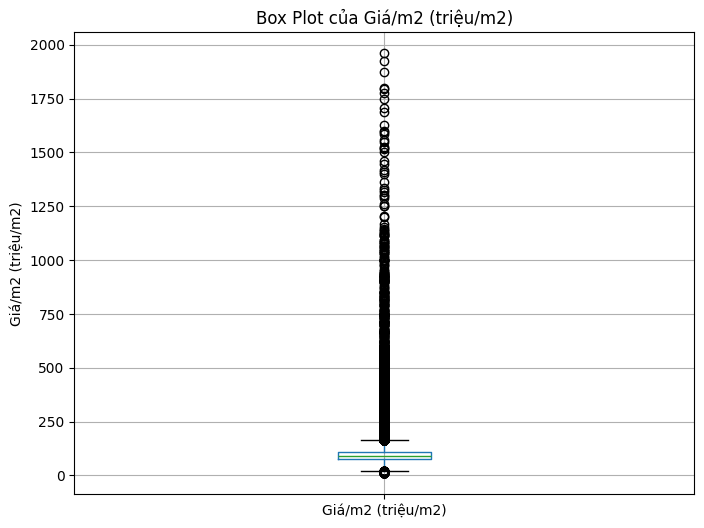

In [84]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Giá/m2 (triệu/m2)')
plt.title('Box Plot của Giá/m2 (triệu/m2)')
plt.ylabel('Giá/m2 (triệu/m2)')
plt.show()

### Giá trị của các cột có kiểu numeric phân bố như thế nào?
- Phần trăm các giá trị bị thiếu là bao nhiêu?
- Giá trị lớn nhất? Giá trị nhỏ nhất? Có gì bất thường không?


Đối với các cột có kiểu numeric, chúng ta sẽ tính:
- Phần trăm (từ 0 tới 100) của giá trị bị thiếu
- Giá trị nhỏ nhất
- Tứ phân vị 25
- Tứ phân vị 50
- Tứ phân vị 75
- Giá trị lớn nhất

Lưu kết quả vào DataFrame `num_col_info_df`, trong đó:
- Tên của các cột là tên của các cột có kiểu numeric trong `df`
- Tên của các dòng: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"

In [85]:
num_col_info_df = None

num_col_info_df = df.select_dtypes(include=np.number).copy()

def missing_ratio(column):
    return ((column.isnull().sum() / column.shape[0]) * 100).round(1)

def lower_quartile(column):
    return (column.quantile(0.25)).round(1)

def median(column):
    return (column.median())

def upper_quartile(column):
    return (column.quantile(0.75)).round(1)

# Làm tròn giá trị đến 1 chữ số thập phân
num_col_info_df = num_col_info_df.round(1)

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Diện_tích,Giá/m2 (triệu/m2),Tổng_giá (Triệu đồng)
missing_ratio,0.0,0.0,0.0
min,1.0,10.2,175.0
lower_quartile,34.0,74.2,2750.1
median,40.0,90.5,3550.1
upper_quartile,50.0,110.6,5000.0
max,1000.0,1960.0,279998.8


### Giá trị của các cột có kiểu categorical phân bố như thế nào?
- Phần trăm giá trị bị thiếu là bao nhiêu?
- Có bao nhiêu giá trị phân biệt? Hiển thị một vài giá trị
- Có gì bất thường không?

Đối với các cột có kiểu categorical, chúng ta sẽ tính:
- Phần trăm (từ 0 tới 100) của giá trị bị thiếu
- Số lượng giá trị (giá trị phân biệt, không xét các giá trị bị thiếu)
Lưu kết quả vào DataFrame num_col_info_df, trong đó:
- Tên của các cột là tên của các cột có kiểu không phải numeric trong `df`
- Tên của các dòng: "missing_ratio", "num_values"

In [86]:
cat_col_info_df = df.select_dtypes(exclude=[np.number])

def missing_ratio(column):
    return ((column.isnull().sum() / column.shape[0]) * 100).round(1)

# Hàm tính số lượng giá trị
def num_values(column):
    return column.nunique()

# Hàm tính tỷ lệ của từng giá trị
def value_ratios(column):
    value_counts = column.value_counts() #Đếm số lượng của mỗi loại value trong 1 cột
    non_missing_count = value_counts.sum() #Tổng số lượng của tất cả value trong 1 cột
    ratios = (value_counts / non_missing_count * 100).round(1) #Lưu tỉ lệ vào Series
    ratios_dict = ratios.to_dict()
    sorted_ratios_dict = dict(sorted(ratios_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_ratios_dict

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Đường,Quan
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,172,13664,30,286,5,4,12,5035,28
value_ratios,"{2020-08-04 00:00:00: 3.2, 2020-08-03 00:00:00...","{'Đường Minh Khai, Phường Minh Khai, Quận Hai ...","{'Quận Đống Đa': 17.0, 'Quận Thanh Xuân': 15.8...","{'Phường Khương Trung': 3.5, 'Phường Khương Đì...","{'Nhà ngõ, hẻm': 75.4, 'Nhà mặt phố, mặt tiền'...","{'Đã có sổ': 64.2, 'Chưa rõ': 35.0, 'Đang chờ ...","{'4 phòng': 35.4, '3 phòng': 33.2, '5 phòng': ...","{'Đường Minh Khai': 2.2, 'Đường Kim Giang': 1....","{'Dong Da': 17.0, 'Thanh Xuan': 15.8, 'Hoang M..."


# Lưu thành file CSV

In [88]:
df.to_csv('VN_housing_dataset_preprocessed.csv',index=False)
